# CE-40959: Deep Learning
## HW2 - CIFAR-10 Classification (Pytorch)

(18 points)

### Deadline: 23 Esfand

#### Name:
#### Student No.:


Please review `Pytorch Tutorial` notebook (materials of the TA classes) before coming to this notebook and you can use `pytorch.org` to learn how to use PyTorch classes and commands.

In this part you have to implement MLP for Classification of CIFAR-10 dataset. 

PyTorch provides the elegantly designed modules and classes `torch.nn`, `torch.optim` , `Dataset` , and `DataLoader` to help you create and train neural networks. In this homework you use them for your implementations.

In [0]:
import numpy as np
import os
import matplotlib.pyplot as plt
import torch
import torchvision

#### 3.1. Load Data:

Complete the followed cell for data loading. 
In this cell you have to normalize, split and shuffle data for learning.

In [6]:
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

trainloader = None
validationloader = None
testloader = None
##################################################################################
# TODO: Use 'torchvision.datasets.CIFAR-10' class for loading CIFAR-10 dataset.  #
# This dataset has 50000 data for training and 10000 data for test and every     #
# data has shape (3*32*32).                                                      #
# Also Use 'torchvision.transforms.Compose' for common image transformations     #
# such as normalization and use 'torch.utils.data.DataLoader' class that it      #
# represents a Python iterable over a dataset and divides data to Batches.       #
# Then Split data into 3 part: Train, Validation and Test. Finally,              #
# save iterable data in 'trainloader', 'validationloader', 'testloader'.         #
##################################################################################

batch_size_train = 64
batch_size_test = 64

valid_size = 0.2

transform = transforms.Compose([
                                transforms.ToTensor(), 
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                ])

train_validatation_set = torchvision.datasets.CIFAR10(
    root='./data', train=True, download=True, transform=transform
    )

num_train = len(train_validatation_set)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))

trainloader = torch.utils.data.DataLoader(
    train_validatation_set, batch_size=batch_size_train, 
    sampler=SubsetRandomSampler(indices[split:])
    )

validationloader = torch.utils.data.DataLoader(
    train_validatation_set, batch_size=batch_size_train, 
    sampler=SubsetRandomSampler(indices[:split])
    )


test_set = torchvision.datasets.CIFAR10(
    root='./data', train=False,download=True, transform=transform
    )

testloader = torch.utils.data.DataLoader(
    test_set, batch_size=batch_size_test , shuffle=False, num_workers=2
    )

##################################################################################
#                               End of your code                                 #
##################################################################################

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


#### 3.2. Load Data Test:

In [7]:
############################################################
# Run the following code an check the size of each batch   #
############################################################
examples = enumerate(trainloader)
batch_idx, (example_data, example_targets) = next(examples)
print('The size and type of each batch in ''trainloader'' is:')
print(example_data.size())
print(type(example_data))
examples = enumerate(testloader)
batch_idx, (example_data, example_targets) = next(examples)
print('\nThe size and type of each batch in ''testloader'' is:')
print(example_data.size())
print(type(example_data))

The size and type of each batch in trainloader is:
torch.Size([64, 3, 32, 32])
<class 'torch.Tensor'>

The size and type of each batch in testloader is:
torch.Size([64, 3, 32, 32])
<class 'torch.Tensor'>


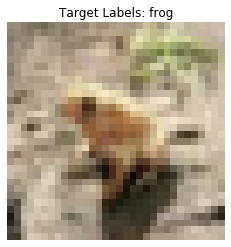

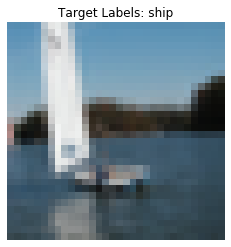

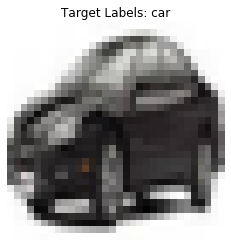

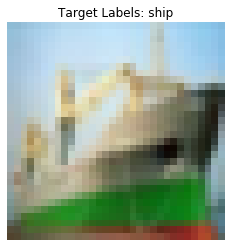

In [8]:
#####################################################################
# Run the following code and see some of the samples in the dataset #
#####################################################################

dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images:
for i in range(4):
    img=torchvision.utils.make_grid(images[i])
    ###########################################################
    #  If you normalize data , here unnormalize them to see   # 
    #  clear them.                                            #
    ###########################################################
    m = 0.5
    s = 0.5
    img = img * s + m    # unnormalize
    ###########################################################
    #                   End of your code                      #
    ###########################################################
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2, 0)))
    plt.title("Target Labels: {}".format(classes[labels[i]]))
    plt.axis('off')
    plt.show()
    

#### 3.3. Network Design:
Design the layer of your network and select proper hyperparameter. 



In [0]:
import torch.nn as nn

######################################################################
# TODO: Use 'torch.nn' module to design your network for CIFAR-10    #
# classification. You have to implement the structure of MLP for it. #
# In your design you don't have any limitation and you can use       #
# Batch-norm layers, Drop-out layers and etc for generalization      #
# improvement (if needed). Use classes and modules from 'torch.nn'.  #
# In the following code, the 'MLP' class is your MLP network and     #
# this class is inherited from nn.Module, so you can benefit         #
# properties of the 'nn.Module'.You may complete '__init__()'        #
# constructor by some classes like 'nn.ReLU()' or 'nn.Linear()'      #
# to use them in the forward pass of your network.                   #
######################################################################
  
class MLP(nn.Module):
    def __init__(self, D_in, H1, H2, H3, D_out):
        super(MLP, self).__init__()
        
        self.linear1 = torch.nn.Linear(D_in, H1)
        self.batch1 = torch.nn.BatchNorm1d(H1)
        self.relu1 = torch.nn.ReLU()

        self.linear2 = torch.nn.Linear(H1, H2)
        self.dropout2 = torch.nn.Dropout(p=0.5)
        self.relu2 = torch.nn.ReLU()

        self.linear3 = torch.nn.Linear(H2, H3)
        self.batch3 = torch.nn.BatchNorm1d(H3)
        self.relu3 = torch.nn.ReLU()
        
        self.linear4 = torch.nn.Linear(H3, D_out)

    def forward(self, x):
        out1 = self.relu1(self.batch1(self.linear1(x)))
        out2 = self.relu2(self.dropout2(self.linear2(out1)))
        out3 = self.relu3(self.batch3(self.linear3(out2)))
        
        out = self.linear4(out3)
        return out

######################################################################
#                          End of your code                          #
######################################################################

#### 3.4. Optimization Algorithm:

In [0]:
import torch.optim as optim

#############################################################################
# TODO: Use a Classification Cross-Entropy loss.Then, use 'torch.optim'     #
# module to optimize Cross-Entropy loss. You should select a optimization   #
# algorithm and its hyperparameters like learning rate.                     #
#############################################################################
net = MLP(3072, 100, 100, 50, len(classes))
learning_rate = 1e-3
criterion = torch.nn.functional.cross_entropy
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

#############################################################################
#                             End of your code                              #
#############################################################################

#### 3.5. Training:
You have to tweak `hidden_dim`, `leanirng_rate`, `weight_scale`, `num_epochs` and `reg` and etc to get a validation accuracy above 50%.

In [0]:
def plot_history(loss, train_acc, val_acc):
    x = [i for i in range(len(loss))]
    
    # plot for losses
    plt.plot(x, loss, '-g', label='train')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(loc='upper right')
    plt.show()
    
    # plot for accuracies
    plt.plot(x, train_acc, '-g', label='train')
    plt.plot(x, val_acc, '-r', label='validation')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(loc='upper left')
    plt.show()

[Batch 125 / 625] loss: 2.569
[Batch 250 / 625] loss: 2.630
[Batch 375 / 625] loss: 2.582
[Batch 500 / 625] loss: 2.566
[Batch 625 / 625] loss: 2.633
(Epoch 1 / 100) train acc: 53.98%; val_acc: 47.85%
[Batch 125 / 625] loss: 2.524
[Batch 250 / 625] loss: 2.531
[Batch 375 / 625] loss: 2.569
[Batch 500 / 625] loss: 2.566
[Batch 625 / 625] loss: 2.562
(Epoch 2 / 100) train acc: 54.65%; val_acc: 48.18%
[Batch 125 / 625] loss: 2.461
[Batch 250 / 625] loss: 2.505
[Batch 375 / 625] loss: 2.531
[Batch 500 / 625] loss: 2.554
[Batch 625 / 625] loss: 2.513
(Epoch 3 / 100) train acc: 55.28%; val_acc: 48.42%
[Batch 125 / 625] loss: 2.395
[Batch 250 / 625] loss: 2.460
[Batch 375 / 625] loss: 2.511
[Batch 500 / 625] loss: 2.460
[Batch 625 / 625] loss: 2.533
(Epoch 4 / 100) train acc: 56.07%; val_acc: 48.29%
[Batch 125 / 625] loss: 2.381
[Batch 250 / 625] loss: 2.439
[Batch 375 / 625] loss: 2.455
[Batch 500 / 625] loss: 2.429
[Batch 625 / 625] loss: 2.467
(Epoch 5 / 100) train acc: 56.74%; val_acc: 48

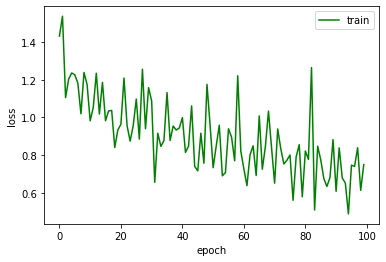

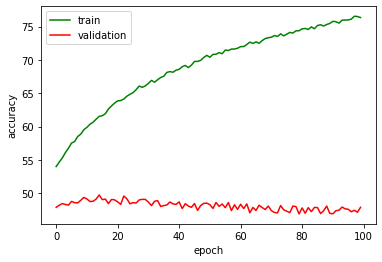

In [41]:
#######################################################
# TODO: Feed the inputs data to the MLP network and   #
# optimize Cross-Entropy loss by using target labels. #
# Then update weights and biases.                     #
#######################################################

num_epochs=100
num_batchs = len(trainloader)

train_loss = []
train_accuracy = []
validation_accuracy = []

for epoch in range(num_epochs):
    total_train=0
    correct_train=0
    running_loss = 0.0
    for batch, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        (b_size, n_channel, w, h) = inputs.shape
        inputs = inputs.reshape(b_size, n_channel * w * h)

        # zero the parameter gradients:
        optimizer.zero_grad()
        pass

        # forward pass:
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        pass

        # backward pass:
        loss.backward()
        pass

        # optimization:
        optimizer.step()

        pass
        #############################################
        #           End of your code                #
        #############################################
        

        # Results: 
        running_loss += loss.item()

        total_train += labels.size(0)
        _, predicted_train = torch.max(outputs.data, 1)
        correct_train += (predicted_train == labels).sum().item()

        if batch % (num_batchs/10) == ((num_batchs/10) -1):
            print('[Batch %d / %d] loss: %.3f' %
                  (batch + 1, num_batchs, running_loss / (num_batchs/10)))
            running_loss = 0.0
            torch.save(net.state_dict(), './model.pth')
            torch.save(optimizer.state_dict(), './optimizer.pth')
        
    correct = 0
    total = 0

    
    with torch.no_grad():
        for data in validationloader:
            images, labels = data

            (b_size, n_channel, w, h) = images.shape
            images = images.reshape(b_size, n_channel * w * h)
            
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    train_acc = correct_train / total_train
    
    train_loss.append(loss.item())
    train_accuracy.append(100 * train_acc)
    validation_accuracy.append(100 * val_acc)

    print('(Epoch %d / %d) train acc: %.2f%%; val_acc: %.2f%%' % (
          epoch+1, num_epochs, 100*train_acc, 100*val_acc))
    
plot_history(train_loss, train_accuracy, validation_accuracy)

#### 3.6. Test: 
Run the following cell and test your network.

In [44]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data

        (b_size, n_channel, w, h) = images.shape
        images = images.reshape(b_size, n_channel * w * h)

        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
test_acc = correct / total
print('Accuracy of the network on the test images: %2f %%' % (100 * test_acc ))

Accuracy of the network on the test images: 46.870000 %


In [45]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data

        (b_size, n_channel, w, h) = images.shape
        images = images.reshape(b_size, n_channel * w * h)

        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 56 %
Accuracy of  bird : 32 %
Accuracy of   cat : 21 %
Accuracy of  deer : 45 %
Accuracy of   dog : 49 %
Accuracy of  frog : 42 %
Accuracy of horse : 42 %
Accuracy of  ship : 58 %
Accuracy of truck : 47 %


In [47]:
print('(Epochs %d) train acc: %.2f%%; val_acc: %.2f%%; test_acc: %.2f%%' % (num_epochs, 100*train_acc, 100*val_acc, 100*test_acc))

(Epochs 100) train acc: 76.37%; val_acc: 47.86%; test_acc: 46.87%
